# FastTag Fraud Detection

## Problem Statement

Fastag is an electronic toll collection system that uses Radio Frequency Identification (RFID) technology to enable automatic deduction of toll charges as vehicles pass through toll plazas, promoting cashless transactions and reducing traffic congestion. However, with the increasing adoption of Fastag, there has been a corresponding rise in fraudulent activities such as unauthorized usage, cloning of tags, and false transactions, posing significant challenges to the system's integrity.

The objective of this project is to develop a robust machine learning model to accurately detect and predict fraudulent transactions in Fastag systems. Our aim is to enhance the security and integrity of digital toll transactions, thereby minimizing financial losses due to fraud. 



The dataset used in this project comprises the following features : 

* **Transaction Features:** 
    * `Transaction_ID`: Unique Identifier Of a transaction van. Can be used to identify transaction frequency of a  specific Fasttag ID helping the identification of fraud.
    * `Transaction_Amount`: Amount paid for transaction.
    * `Timestamp`: Day and Time Of Transaction. Catches unusual transaction times.
* **Vehicle Features:**
    * `Vehicle_Type`: Categorical feature indicating the type of vehicle. Some vehicle types might be more prone to fraud.
    * `Vehicle_Dimensions`: Dimensions of the vehicle might help in identifying discrepancies when compared with expected values for the given vehicle type.
    * `Vehicle_Speed`: Speed of the vehicle during the transaction. Unusual speeds might indicate fraudulent activity.
    * `Vehicle Plate Number`: License plate numbers, Analyzing patterns and anamolies in this plate that might be indicative of fraud.

* **Location Features:**
    * `Geographical_Location`: Encode geographical locations of transactions. Anomalous locations or large distances between successive transactions could indicate fraud.
    * `TollBoothID`: Identifier for the toll booth. Unusual toll booth usage patterns might be indicative of fraud.
    * `Lane_Type`: Type of lane used for the transaction. Certain lanes might have higher fraud rates.

* **Historical Features:**
    * `Fraud_indicator`: Indicates the presence of fraudulent transactions for a given Fastag ID or vehicle.


By developing an effective Fastag fraud detection system, this project aims to safeguard the digital toll collection process, ensuring a secure and efficient transaction environment for users and authorities alike.



## Importing Libraries :

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_score, recall_score, f1_score
from xgboost import XGBClassifier as xgb


- **pandas** will be used for data manipulation and analysis, handling data in tabular form, making it easy to load, manipulate, and analyze datasets.
  
- **numpy** will be used for numerical computing, supporting multi-dimensional arrays and mathematical operations, which are essential for handling and processing numerical data.

- **matplotlib** and **seaborn** are libraries that we imported for visualizing data. They provide a variety of tools for creating static, animated, and interactive visualizations, allowing us to understand data patterns and insights.

- **LabelEncoder** from `sklearn.preprocessing` allows the inclusion of categorical features into our machine learning algorithms by converting categorical labels into numeric form.

- **StandardScaler** from `sklearn.preprocessing` will be used to standardize features by removing the mean and scaling to unit variance, which is crucial for optimizing the performance of many machine learning algorithms.

- **LogisticRegression** from `sklearn.linear_model` will be used for performing logistic regression, a statistical method for analyzing a dataset with one or more independent variables that determine a binary outcome.

- **DecisionTreeClassifier** from `sklearn.tree` will be used for implementing decision tree algorithms for classification tasks, which predict the class of an instance by learning simple decision rules from the data features.

- **RandomForestClassifier** from `sklearn.ensemble` will be used for implementing random forest algorithms for classification tasks, which is an ensemble method that fits multiple decision trees on various sub-samples and uses averaging to improve predictive accuracy and control over-fitting.

- **XGBClassifier** from `xgboost` will be used for implementing extreme gradient boosting algorithms for classification tasks, which provide efficient and accurate predictions through advanced ensemble techniques and regularization.

- **train_test_split** from `sklearn.model_selection` will be used for splitting our dataset into training and testing sets, enabling us to evaluate the performance of our machine learning models on unseen data.

- **GridSearchCV** from `sklearn.model_selection` will be used for hyperparameter tuning, allowing us to find the best parameters for our models by performing an exhaustive search over a specified parameter grid.

- **accuracy_score** from `sklearn.metrics` will be used for calculating the accuracy of classification models, which is the ratio of correctly predicted instances to the total instances.

- **confusion_matrix** from `sklearn.metrics` will be used for evaluating classification models by showing the counts of true positive, true negative, false positive, and false negative predictions.

- **roc_curve** from `sklearn.metrics` will be used to compute the Receiver Operating Characteristic (ROC) curve, which is a graphical plot illustrating the diagnostic ability of a binary classifier system.

- **roc_auc_score** from `sklearn.metrics` will be used to calculate the Area Under the ROC Curve (AUC), which provides an aggregate measure of performance across all classification thresholds.

- **classification_report** from `sklearn.metrics` will be used to provide a detailed performance report of classification models, including precision, recall, F1-score, and support for each class.

- **precision_score** from `sklearn.metrics` will be used to calculate the precision, which is the ratio of true positive predictions to the total predicted positives, indicating the accuracy of positive predictions.

- **recall_score** from `sklearn.metrics` will be used to calculate the recall, which is the ratio of true positive predictions to the total actual positives, indicating the ability of the model to identify positive instances.

- **f1_score** from `sklearn.metrics` will be used to calculate the F1-score, which is the harmonic mean of precision and recall, providing a balance between precision and recall.

## Loading dataset :

In this phase we'll be loading our dataset into dataframe using Pandas

In [26]:
df = pd.read_csv('data.csv')
df.describe() # to get the summary of the data

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


## Pre_processing & Expolring Data : 

In [27]:
df.isna().sum()#to check for missing values


Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [28]:
df.dropna(inplace=True) # drop missing values
df.duplicated().sum() # to check for duplicates  


0

In [29]:
df.drop_duplicates(inplace=True) # to drop duplicates
df.info() # to get the data types of the columns
df.describe() # to get the summary of the data

<class 'pandas.core.frame.DataFrame'>
Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         4451 non-null   int64 
 1   Timestamp              4451 non-null   object
 2   Vehicle_Type           4451 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            4451 non-null   object
 5   Lane_Type              4451 non-null   object
 6   Vehicle_Dimensions     4451 non-null   object
 7   Transaction_Amount     4451 non-null   int64 
 8   Amount_paid            4451 non-null   int64 
 9   Geographical_Location  4451 non-null   object
 10  Vehicle_Speed          4451 non-null   int64 
 11  Vehicle_Plate_Number   4451 non-null   object
 12  Fraud_indicator        4451 non-null   object
dtypes: int64(4), object(9)
memory usage: 486.8+ KB


,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,4451.000000,4451.000000,4451.000000,4451.000000
mean,2466.227140,180.927881,158.684565,67.884745
std,1428.941144,103.004437,99.857565,16.632295
min,1.000000,0.000000,0.000000,10.000000
25%,1254.500000,110.000000,100.000000,55.000000
50%,2405.000000,140.000000,120.000000,67.000000
75%,3702.500000,300.000000,180.000000,82.000000
max,5000.000000,350.000000,350.000000,118.000000


head of dataframe : 

In [30]:
df.head()


,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
5,6,1/11/2023 10:00,Sedan,FTG-066-GHI-987,A-101,Regular,Medium,160,100,"13.059816123454882, 77.77068662374292",105,KA77KL0123,Fraud


Tail of dataframe :

In [31]:
df.tail()


,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud
4999,5000,3/10/2023 0:59,Bus,FTG-459-WSX-543,C-103,Regular,Large,330,125,"13.21331620748757, 77.55413526894684",86,KA37AB3456,Fraud


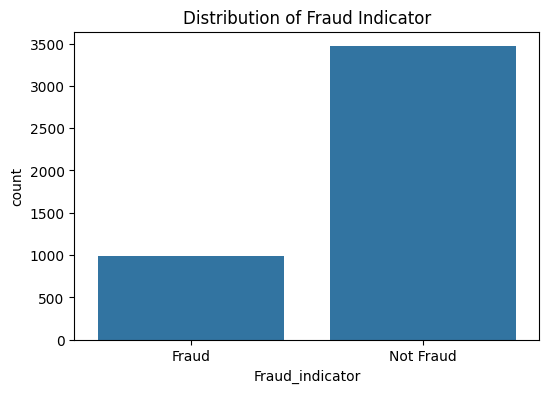

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Fraud_indicator', data=df)
plt.title('Distribution of Fraud Indicator')
plt.show()

By observing the counterplot we can distinguish the distribution between fraudulent and non-fraudulent transactions. This figure suggests that we have an imbalanced dataset in other words, far more non-fraudulent transactions than fraudulent ones are made, this informs us that we need to apply algorithms that handles class imbalance well later to ensure accurate and precise model performance.

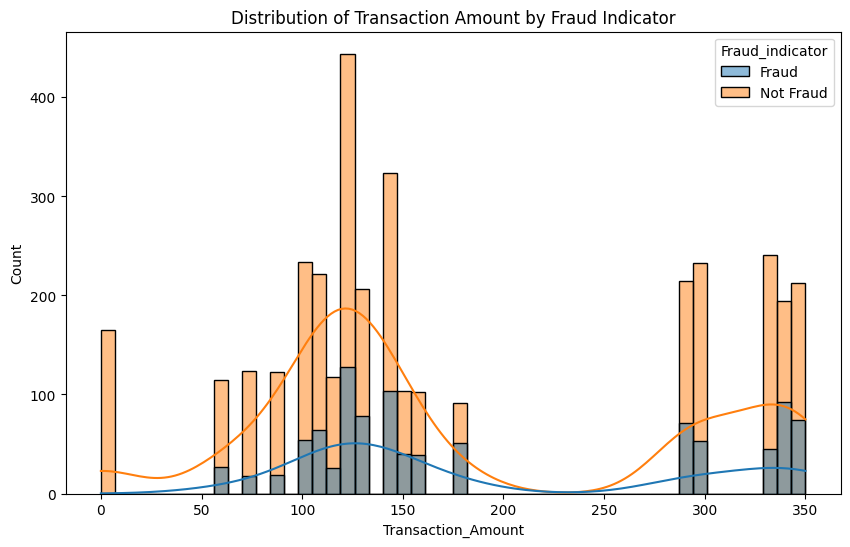

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Transaction_Amount', hue='Fraud_indicator', kde=True, bins=50)
plt.title('Distribution of Transaction Amount by Fraud Indicator')
plt.show()

the non-fraudulent transactions are more frequent across most transaction amounts compared to the fraudulent transactions. The transaction amounts exhibit multiple peaks indicating common transaction values, with notable spikes at amounts around 100, 150, and 350.

 Fraudulent transactions are spread across various transaction amounts but tend to have lower counts compared to non-fraudulent transactions. There is a noticeable concentration of fraudulent transactions in lower transaction amounts (below 50) and other specific ranges such as around 100 and 150. Non-fraudulent transactions have a higher frequency and show distinct peaks at specific transaction amounts like around 100, 150, and 350. The density curve for non-fraudulent transactions shows a smoother and more consistent pattern, indicating more regular transaction amounts.

These observations suggest that fraudulent transactions might be more likely at lower amounts and at specific peaks. Peaks in non-fraudulent transactions could indicate typical transaction values, while deviations from these patterns might signal fraudulent activity. This analysis highlights the importance of transaction amount patterns in fraud detection.

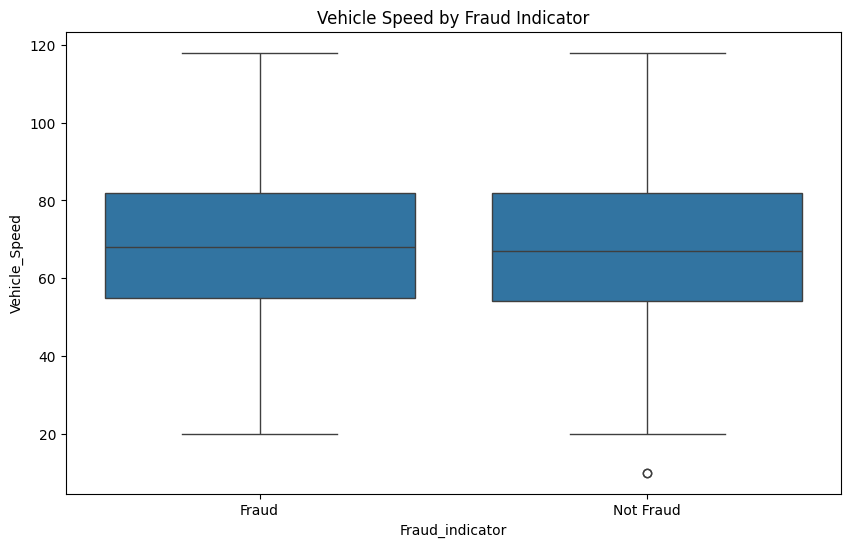

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud_indicator', y='Vehicle_Speed', data=df)
plt.title('Vehicle Speed by Fraud Indicator')
plt.show()


Patterns such as consistently high speeds or improbable travel distances between toll plazas can trigger alerts for further investigation. Moreover, analyzing speed patterns can help differentiate between legitimate use and suspicious activities, contributing to the overall security and integrity of the FASTag system.

The Fraudulent category has a slightly narrower interquartile range (IQR) compared to the non fraudulent category this suggests that vehicle speed in fraud cases is more consistent and clustered around the mean promoting for the exhibtion of greater variability in vehicle speed for non fraudulent cases.

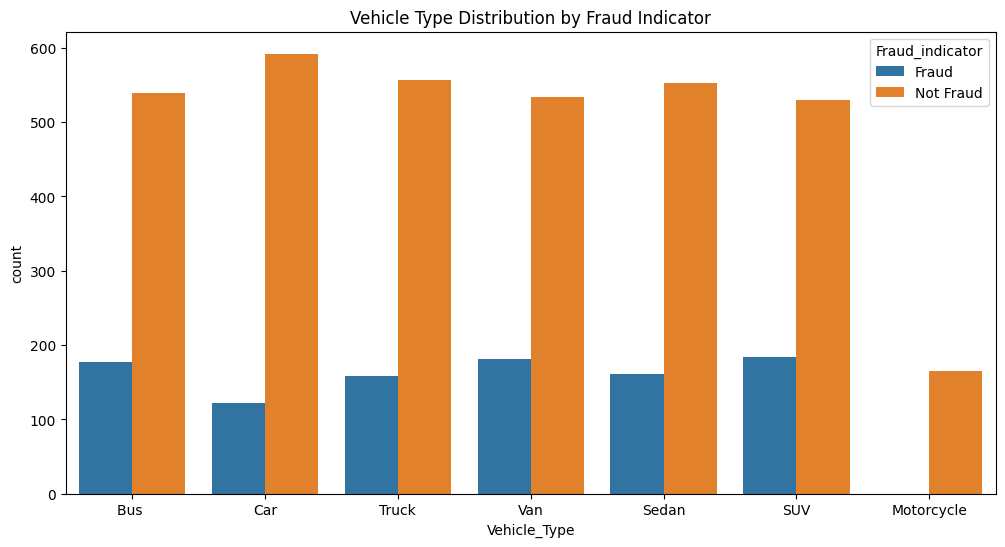

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Vehicle_Type', hue='Fraud_indicator', data=df)
plt.title('Vehicle Type Distribution by Fraud Indicator')
plt.show()

Vehicle type serves as a critical feature in our models aimed at identifying fraudulent activities. By categorizing vehicles into specific types such as cars, buses, motorcycles, trucks, SUVs, and vans, we can leverage this categorical data to build predictive models that detect anomalies in toll transactions.

he type of vehicle becomes a key input feature because it influences the expected toll charges and usage patterns. For instance, a sudden increase in transactions categorized under a smaller vehicle type but showing characteristics of a larger vehicle type could indicate potential misuse of FASTag.
 This baseline is essential for comparing actual transactions and identifying deviations that might signify fraud.

 This plot shows the distribution of transactions across different vehicle types, separated by the fraud indicator, as 'SUV' ,'Van' and 'Bus' categories contributes to the highest proportions of fraud it indicates that theses types are more vulnerable to fraudulent activities , the operational dynamics of larger vehicles, such as buses and vans, involve complex logistics and multiple drivers. This complexity can sometimes lead to lapses in oversight or accountability, making it easier for fraudulent activities to go unnoticed for longer periods. Notably, the 'Car' category  stands out with the highest bar for non fraud cases . Cars are the most common type of vehicle on the road, accounting for a significant portion of overall traffic. This higher representation in non-fraud cases can be attributed to their sheer numbers and everyday usage for commuting and personal travel purposes.






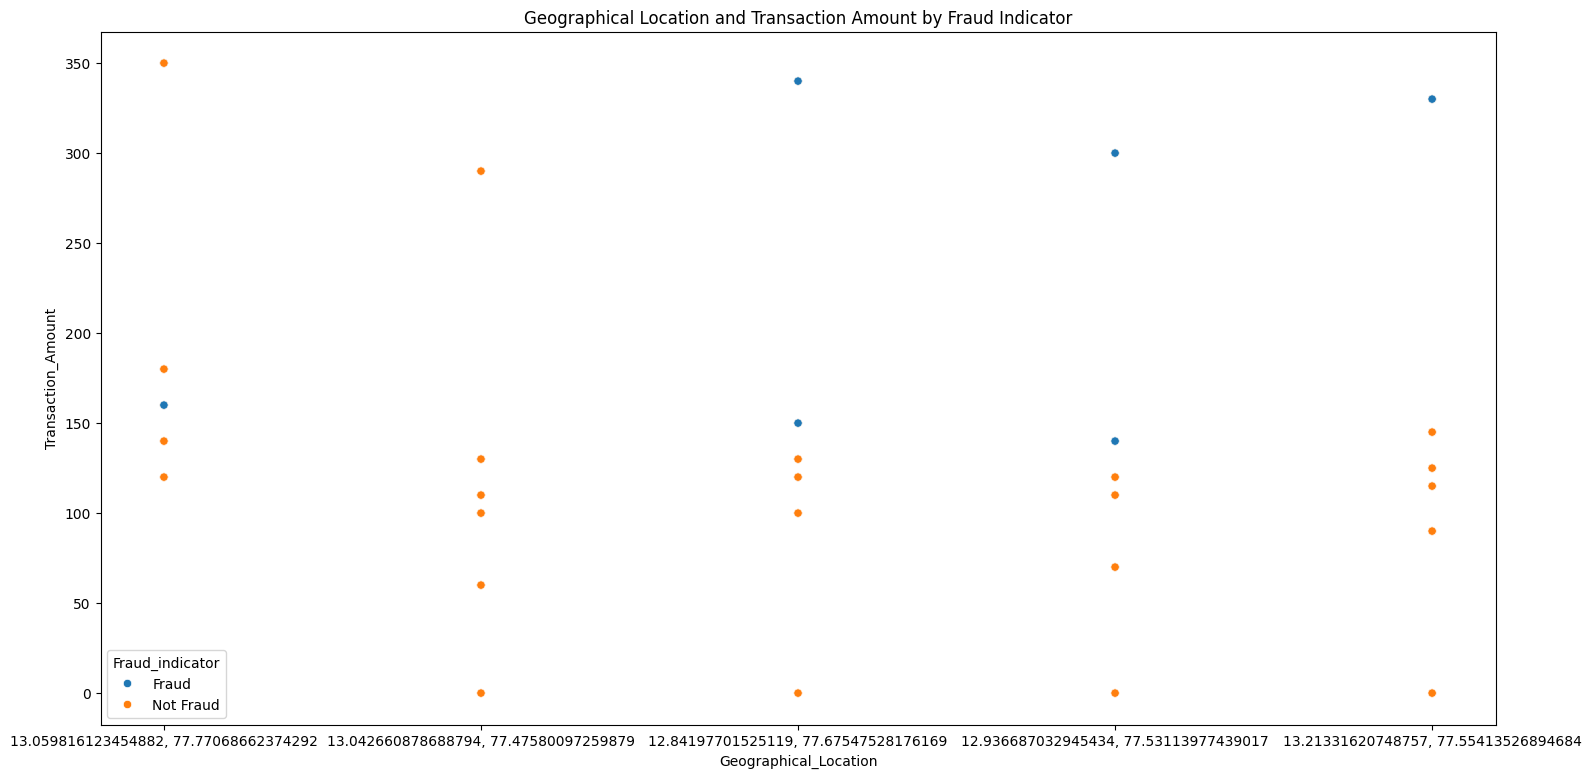

In [43]:
plt.figure(figsize=(18, 9))
sns.scatterplot(x='Geographical_Location', y='Transaction_Amount', hue='Fraud_indicator', data=df)
plt.title('Geographical Location and Transaction Amount by Fraud Indicator')
plt.show()


Geographical Location and Transaction Amount by Fraud Indicator allows us to contextualize transaction data within specific regions, identifying patterns that may indicate fraudulent activities. By mapping transaction frequencies and routes across different geographical areas allowing us to uncover irregularities

This scatter plot shows the relationship between geographical locations and transaction amounts, colored by fraud indicator, The data points are spread across various geographical location with Transaction amounts range from 0 to approximately 350.
While no specific trend emerges, some areas have slightly higher fraud occurences as data observation of fraudulent transactions in 12.8419... and 12.9366... indicates a bit higher rates for fraudulent activity .

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14060\2645286775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Fraud_indicator', y='Vehicle_Dimensions', palette='Set2')


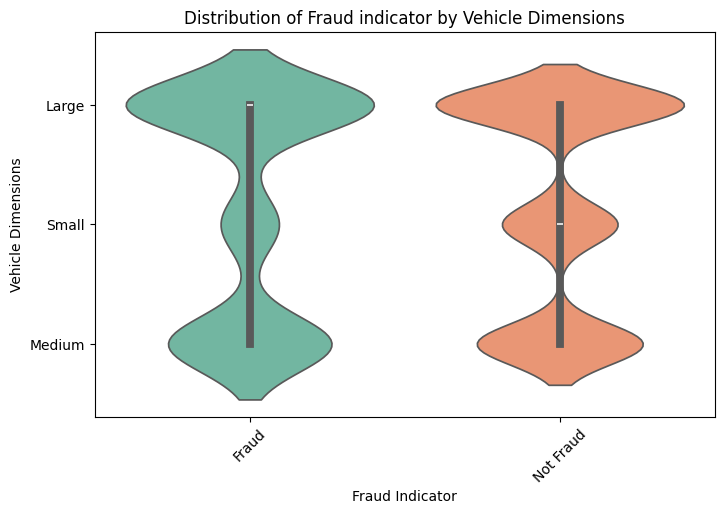

In [48]:
# Violin plot of Vehicle Dimensions by Fraud Indicator
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Fraud_indicator', y='Vehicle_Dimensions', palette='Set2')
plt.title('Distribution of Fraud indicator by Vehicle Dimensions')
plt.xlabel('Fraud Indicator')
plt.ylabel('Vehicle Dimensions')
plt.xticks(rotation=45)
plt.show()

vehicle dimensions can provide critical insights into patterns of fraudulent activity. By examining the distribution of fraud indicators across different vehicle dimensions, such as length and width, we can identify whether certain vehicle types are more prone to fraud. For instance, as the Vehicle Type Distribution by Fraud Indicator figure  indicates, larger vehicles like SUVs and trucks, which typically incur higher toll charges, might show higher instances of fraud as fraudsters attempt to evade higher fees based on this visualization we 're bale to deduce the type of vehicles and therefore, providing more accurate and precise model performance. Visualizing this distribution using  violin plot helps to reveal any significant discrepancies or outliers in fraud occurrences based on vehicle dimensions, allowing for targeted interventions and more efficient monitoring of high-risk vehicle categories. This analysis is pivotal in developing robust predictive model

By comparing the two plots, we can observe how the fraud category indicator varies across different vehicle sizes along with Having higher density for Large and medium dimensions of vehicles . 
Additionally, The low density of the small dimension compared to the other dimensions of vehicles in the fraud category  exhibit lower instances of fraud compared to bigger vehicles like SUVs and trucks

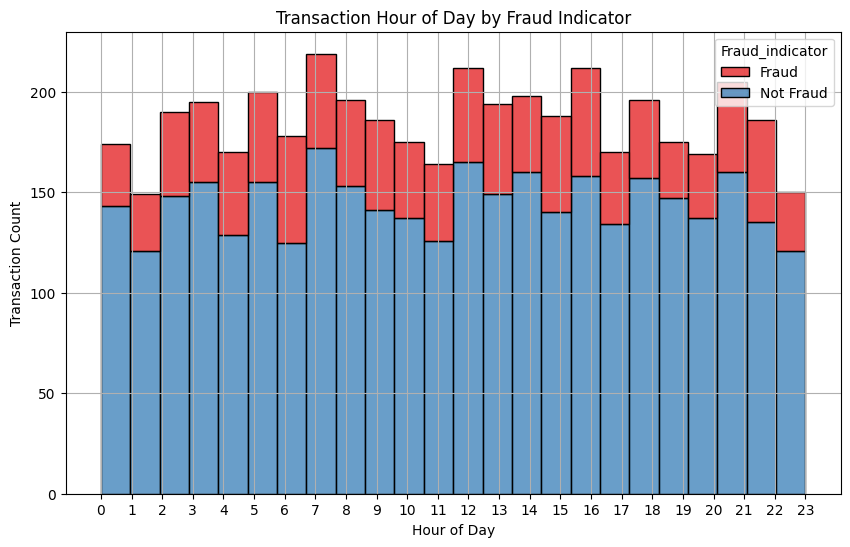

In [50]:

# Extract Hour of Day and Day of Week using day_name() and dt.hour which are pandas functions that extract the day of the week and hour of the day respectively
df['HourOfDay'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.day_name()

# Plotting Hour of Day by Fraud Indicator
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='HourOfDay', hue='Fraud_indicator', multiple='stack', bins=24, palette='Set1')
plt.title('Transaction Hour of Day by Fraud Indicator')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


The "Transaction Hour of Day by Fraud Indicator" analysis helps identify the specific hours when fraudulent transactions are more likely to occur, enabling targeted monitoring and preventive measures during these high-risk periods within the FASTag system.

By examining the bars, we can identify trends in fraudulent activity at different times of day as we can observer that certain hous such as 7h 12h and 16h have higher fraud counts than others that can be considered as spikes during the day.
As for the non fraudulent transaction pattern bar chart , it does show the distribution of the legitimate transactions throughout the day.
Conversely, we couldn't deduce a consistant pattern of the fraud movement which promotes for the stochasticity of the fraudulent activity's distribution accross transaction hours of the day.

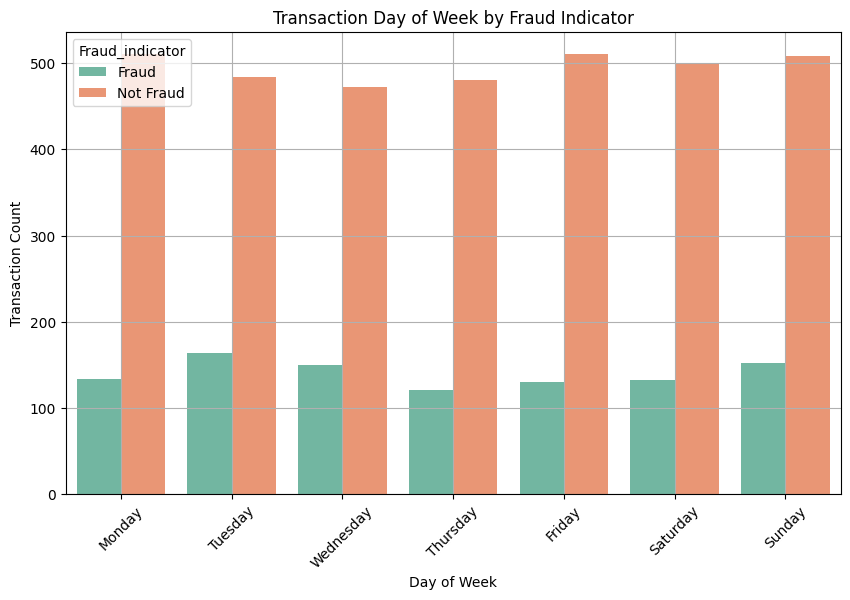

In [51]:
# Plotting Day of Week by Fraud Indicator
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayOfWeek', hue='Fraud_indicator', palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transaction Day of Week by Fraud Indicator')
plt.xlabel('Day of Week')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

By examining the distribution of fraud indicators over weekdays and weekends, we can identify if certain days consistently experience higher instances of fraudulent transactions. This understanding is crucial for optimizing resource allocation and implementing targeted fraud detection strategies. For instance, if Fridays or Mondays consistently show spikes in fraud indicators. This analysis aids in identifying peak periods of fraudulent activity 

Through the observation of this figure we can deduce that fraudulent transactions occurring consistently across all days indicate a pervasive issue within the dataset analyzed. This pattern suggests that fraudsters do not exhibit a preference for specific days when attempting to exploit the FASTag system. Such uniform distribution of fraud indicators across weekdays and weekends necessitates a comprehensive approach to fraud detection and prevention. 

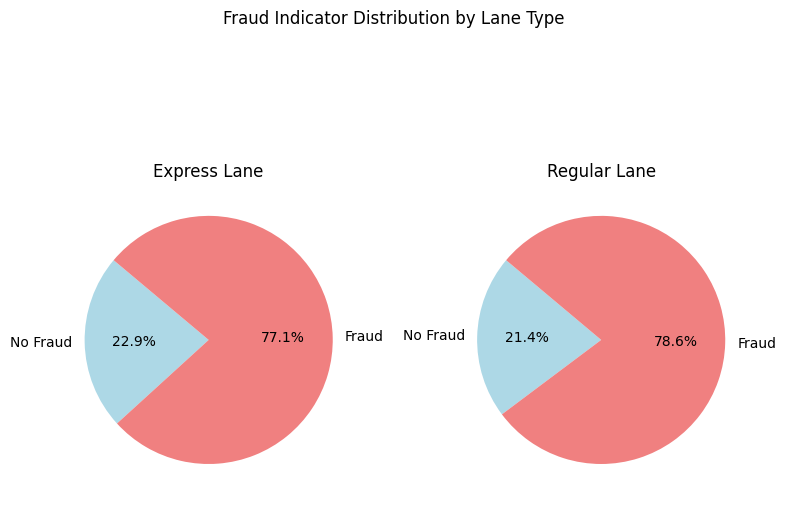

In [52]:
# Group by Lane_Type and Fraud_indicator
grouped = df.groupby(['Lane_Type', 'Fraud_indicator']).size().unstack()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
colors = ['lightblue', 'lightcoral']
labels = ['No Fraud', 'Fraud']

for i, lane_type in enumerate(grouped.index):
    plt.subplot(1, len(grouped), i+1)
    plt.pie(grouped.loc[lane_type], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'{lane_type} Lane')

plt.tight_layout()
plt.suptitle('Fraud Indicator Distribution by Lane Type', y=1.05)
plt.show()

Both categories show a predominant occurrence of fraudulent activities, with the Regular Lane exhibiting a slightly higher proportion at 78.6% compared to 77.1% in the Express Lane. This data underscores a consistent vulnerability across both lane types to fraudulent transactions within the context of the analyzed dataset. Such findings highlight the critical need for enhanced fraud detection measures and robust monitoring systems tailored to each lane type's specific characteristics.